## **KÜTÜPHANELERİ IMPORT ETME VE DATAFRAME'İ OKUMA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR 
from sklearn.metrics import r2_score

In [4]:
dosya_yolu = "ogrenci_basari_veriseti.csv"

try:
    df = pd.read_csv(dosya_yolu)
    print(f"Veri seti '{dosya_yolu}' başarıyla yüklendi.\n")

    
except FileNotFoundError:
    print(f"HATA: '{dosya_yolu}' dosyası bulunamadı! Lütfen dosyanın aynı klasörde olduğundan emin olun.")

Veri seti 'ogrenci_basari_veriseti.csv' başarıyla yüklendi.



## **DATASETİ TANIMA**

In [7]:
df.head(10)

,Ogrenci_ID,Ders_Adi,Haftalik_Ders_Saati,AKTS,Tekrar_Sayisi,Ders_Disi_Calisma_Saati,Arasinav_Notu
0,1,BİL 2009 - Çizge Kuramı,4,6,1,1.5,88.0
1,2,BİL 2009 - Çizge Kuramı,4,6,0,1.0,80.0
2,3,BİL 2009 - Çizge Kuramı,4,6,0,0.0,47.0
3,4,BİL 2009 - Çizge Kuramı,4,6,1,2.5,84.0
4,5,BİL 2009 - Çizge Kuramı,4,6,3,4.0,100.0
5,6,BİL 2009 - Çizge Kuramı,4,6,1,2.0,89.0
6,7,BİL 2009 - Çizge Kuramı,4,6,0,0.0,56.0
7,8,BİL 2009 - Çizge Kuramı,4,6,1,2.5,88.0
8,9,BİL 2009 - Çizge Kuramı,4,6,1,1.5,90.0
9,10,BİL 2009 - Çizge Kuramı,4,6,1,1.5,82.0


In [20]:
def summarize_data(df, name):
    
    print("\n" + "=" * 60)
    print(f"{name.upper()} VERİ SETİ ÖZETİ".center(60))
    print("=" * 60 + "\n")

    print("**1. Boyut ve Gözlem Sayısı (Shape):**")
    print(f"Satır Sayısı (Gözlem): {df.shape[0]}")
    print(f"Sütun Sayısı (Özellik): {df.shape[1]}")
    print("\n" + "-" * 60)
    
    print("**2. Eksik Değer Kontrolü (df.isnull().sum()):**")
    null_counts = df.isnull().sum()
    if null_counts.sum() == 0:
        print("Tüm sütunlarda 0 eksik değer bulundu. Veri temiz.")
    else:
        # Eksik değerleri tablo olarak gösterme
        null_df = null_counts[null_counts > 0].reset_index()
        null_df.columns = ['Sütun Adı', 'Eksik Değer Sayısı']
        try:
            print(null_df.to_markdown(index=False))
        except ImportError:
            print(null_df.to_string(index=False))
    print("\n" + "-" * 60)
    
    print("**3. Veri Tipleri (df.info()):**")
    # df.info() çıktısını doğrudan kullanır, ancak None olarak döner, bu yüzden print'i ayrı yapıyoruz.
    df.info(verbose=False)
    print("\n" + "-" * 60)
    
    print("**4. Tanımlayıcı İstatistikler (df.describe()):**")
    # Sayısal sütunların istatistiklerini tabloya dönüştürür.
    try:
        print(df.describe().T.to_markdown())
    except ImportError:
        print("Tabulate kütüphanesi bulunamadı, düz tablo formatında gösteriliyor:")
        print(df.describe().T.to_string())
    print("\n" + "=" * 60)

### **Veri Analizi Fonksiyonu Tanımlama**

Bu fonksiyon, DataFrame'in detaylı özetini çıkarmak için kullanılacak:
- Veri boyutu ve gözlem sayısı
- Eksik değer kontrolü  
- Veri tipleri bilgisi
- Tanımlayıcı istatistikler

In [21]:
summarize_data(df, "Öğrenci Başarı")


               ÖĞRENCI BAŞARI VERİ SETİ ÖZETİ               

**1. Boyut ve Gözlem Sayısı (Shape):**
Satır Sayısı (Gözlem): 37
Sütun Sayısı (Özellik): 7

------------------------------------------------------------
**2. Eksik Değer Kontrolü (df.isnull().sum()):**
Tüm sütunlarda 0 eksik değer bulundu. Veri temiz.

------------------------------------------------------------
**3. Veri Tipleri (df.info()):**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Columns: 7 entries, Ogrenci_ID to Arasinav_Notu
dtypes: float64(2), int64(4), object(1)
memory usage: 2.2+ KB

------------------------------------------------------------
**4. Tanımlayıcı İstatistikler (df.describe()):**
|                         |   count |      mean |       std |   min |   25% |   50% |   75% |   max |
|:------------------------|--------:|----------:|----------:|------:|------:|------:|------:|------:|
| Ogrenci_ID              |      37 | 19        | 10.8244   |     1 |  10   |    19 |    28 | 

### **DATASETİ GÖRSELLEŞTİRME**

#### **1. Ders Dışı Çalışma Saati Dağılım Analizi**

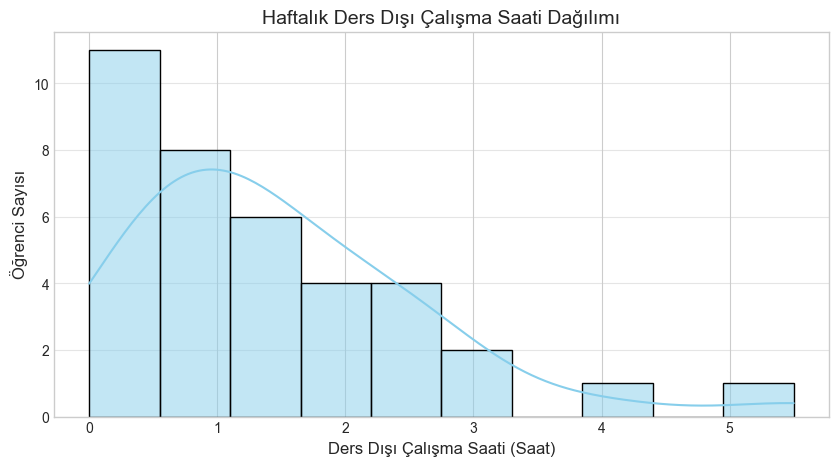

In [45]:
plt.figure(figsize = (10, 5))

sns.histplot(df['Ders_Disi_Calisma_Saati'], bins = 10, kde = True, color = 'skyblue')

plt.title('Haftalık Ders Dışı Çalışma Saati Dağılımı', fontsize = 14)
plt.xlabel('Ders Dışı Çalışma Saati (Saat)', fontsize = 12)
plt.ylabel('Öğrenci Sayısı', fontsize=12)
plt.grid(axis = 'y', alpha = 0.5)
plt.show()

#### **2. Arasınav Notu Dağılım Analizi**

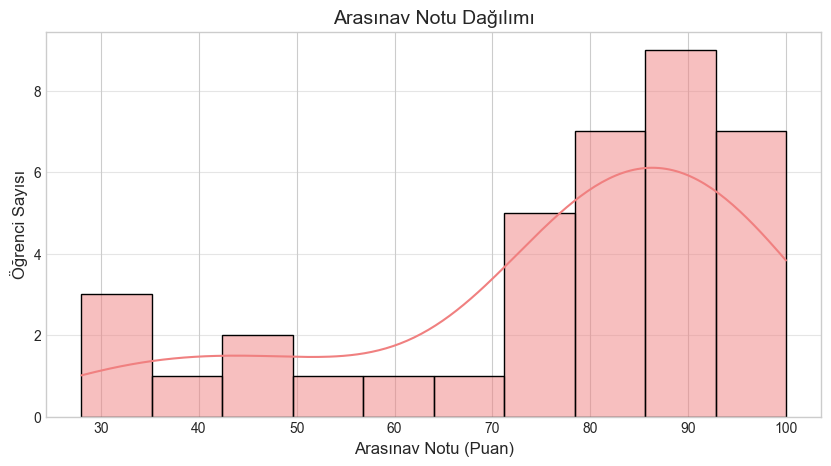

In [46]:
plt.figure(figsize=(10, 5))

sns.histplot(df['Arasinav_Notu'], bins = 10, kde = True, color = 'lightcoral')

plt.title('Arasınav Notu Dağılımı', fontsize = 14)
plt.xlabel('Arasınav Notu (Puan)', fontsize = 12)
plt.ylabel('Öğrenci Sayısı', fontsize = 12)
plt.grid(axis = 'y', alpha = 0.5)
plt.show()

#### **3. Korelasyon Analizi**

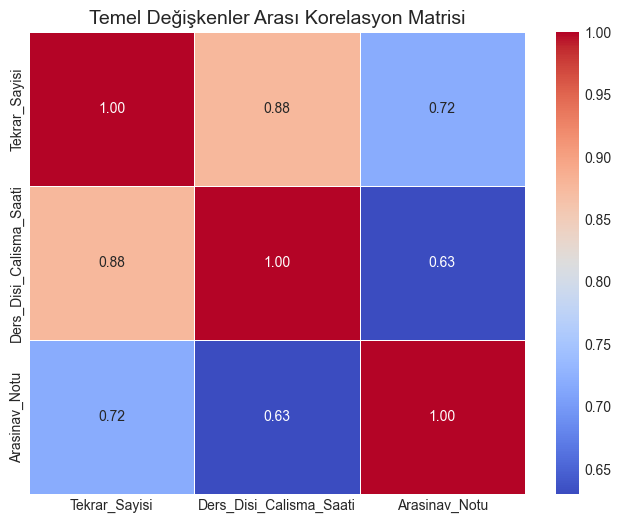

In [47]:
corr_matrix = df[['Tekrar_Sayisi', 'Ders_Disi_Calisma_Saati', 'Arasinav_Notu']].corr()

plt.figure(figsize = (8, 6))

sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'coolwarm', 
            fmt = ".2f", 
            linewidths = .5, 
            cbar = True) 

plt.title('Temel Değişkenler Arası Korelasyon Matrisi', fontsize=14)
plt.show()

## **REGRESYON MODELLEMESİ İÇİN VERİ HAZIRLAMA**

Bu bölümde makine öğrenmesi modelleri için veri setimizi hazırlayacağız:
- **Bağımsız Değişken (X):** Ders Dışı Çalışma Saati
- **Bağımlı Değişken (y):** Arasınav Notu

In [ ]:
X_model = df[['Ders_Disi_Calisma_Saati']].values # 2 boyutlu dizi olması için [[]] kullanıldı
y_model = df['Arasinav_Notu'].values

In [49]:
tahmin_saatleri = np.array([[0.5], [1.0], [1.5], [2.0]])

print(f"\nToplam öğrenci sayısı: {len(df)}")


Toplam öğrenci sayısı: 37


### **ÜÇ FARKLI MODELİ EĞİTME**

### **Model 1: Doğrusal Regresyon (Linear Regression)**

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(X_model, y_model)
y_pred_lin = lin_reg.predict(tahmin_saatleri)
r2_lin = r2_score(y_model, lin_reg.predict(X_model))

**Model Açıklaması:**
- En basit regresyon yöntemi
- Doğrusal bir ilişki varsayar
- Yorumlaması kolay ve hızlı

### **Model 2: Karar Ağacı Regresyonu (Decision Tree Regression)**

In [ ]:
dt_reg = DecisionTreeRegressor(max_depth = 3, random_state = 42) 
dt_reg.fit(X_model, y_model)
y_pred_dt = dt_reg.predict(tahmin_saatleri)
r2_dt = r2_score(y_model, dt_reg.predict(X_model))

**Model Açıklaması:**
- Ağaç yapısında karar kuralları oluşturur
- Doğrusal olmayan ilişkileri yakalayabilir
- `max_depth = 3` ile aşırı öğrenmeyi kontrol ediyoruz

### **Model 3: Destek Vektör Regresyonu (SVR)**

In [52]:
# SVR, veriyi ölçeklendirmeden önce kullanmak için uygundur
svr_reg = SVR(kernel = 'rbf', C = 100, gamma = 'scale', epsilon = 0.1) 
svr_reg.fit(X_model, y_model)
y_pred_svr = svr_reg.predict(tahmin_saatleri)
r2_svr = r2_score(y_model, svr_reg.predict(X_model))

**Model Açıklaması:**
- RBF kernel ile karmaşık ilişkileri modeller
- `C = 100:` Düzenleme parametresi
- `epsilon = 0.1:` Tolerans bandı genişliği

### **TAHMİN SONUÇLARI**

In [53]:
# Tahmin sonuçlarını tabloya dönüştürme
sonuc_df = pd.DataFrame({
    'Çalışma Saati': tahmin_saatleri.flatten(),
    'Linear Tahmin': np.round(y_pred_lin, 2),
    'DecisionTree Tahmin': np.round(y_pred_dt, 2),
    'SVR Tahmin': np.round(y_pred_svr, 2)
})

print("\n" + "-" * 50)
print("--- TAHMİN SONUÇLARI (Başarı Puanı) ---")
print(sonuc_df.to_string(index=False))

print("\n--- MODEL PERFORMANSLARI (R2 Skoru) ---")
print(f"Linear R2:        {r2_lin:.3f}")
print(f"Decision Tree R2: {r2_dt:.3f}")
print(f"SVR R2:           {r2_svr:.3f}")
print("-" * 50)


--------------------------------------------------
--- TAHMİN SONUÇLARI (Başarı Puanı) ---
 Çalışma Saati  Linear Tahmin  DecisionTree Tahmin  SVR Tahmin
           0.5          66.23                64.50       71.14
           1.0          71.74                68.38       79.90
           1.5          77.24                86.83       88.90
           2.0          82.75                91.38       92.90

--- MODEL PERFORMANSLARI (R2 Skoru) ---
Linear R2:        0.397
Decision Tree R2: 0.547
SVR R2:           0.443
--------------------------------------------------


Bu tablo, üç farklı regresyon modelinin belirli çalışma saatleri için yaptığı tahminleri ve model performanslarını (R² skoru) karşılaştırmaktadır.

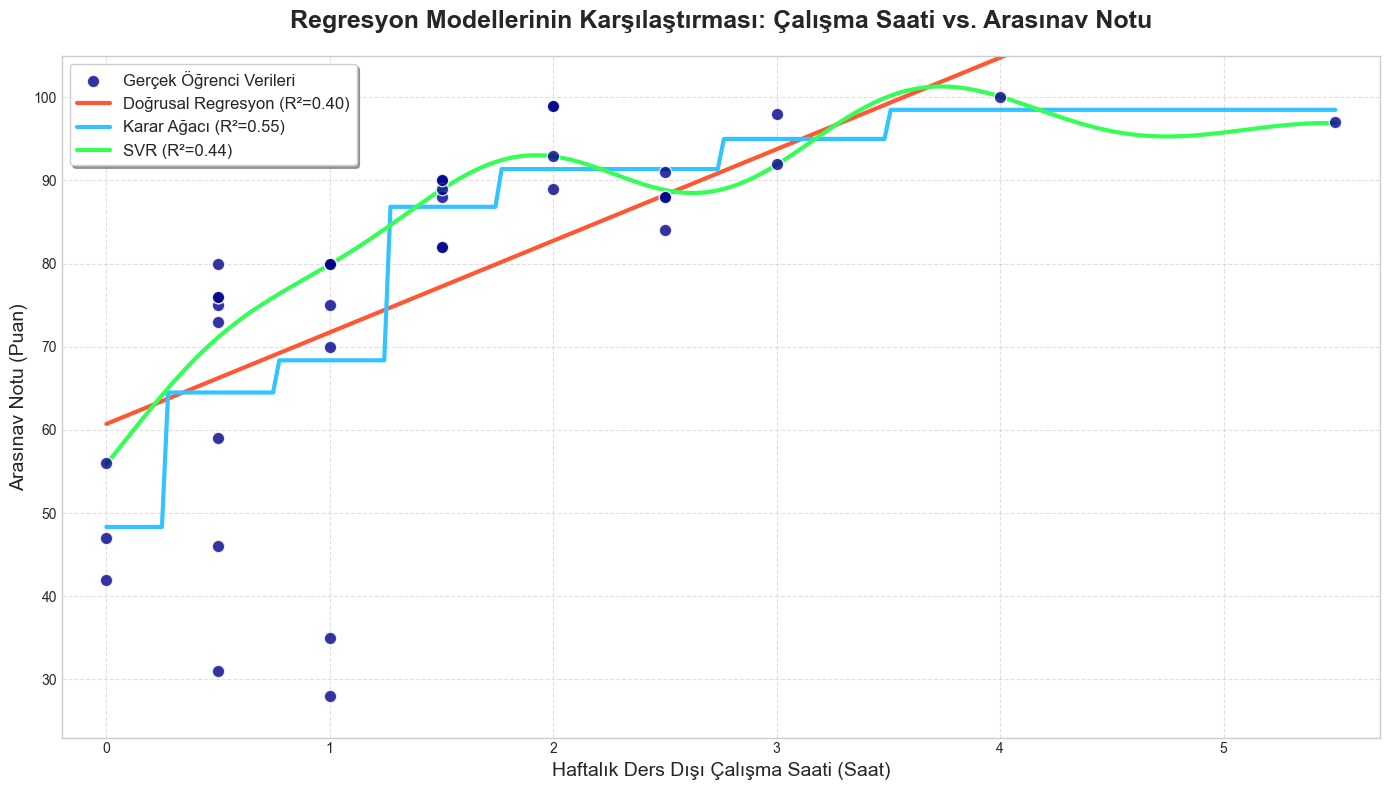

In [ ]:
# =====================================================
# GELİŞMİŞ MODEL KARŞILAŞTIRMA GRAFİĞİ
# =====================================================
# Bu bölümde üç farklı regresyon modelinin performansını
# görsel olarak karşılaştırıyoruz

plt.figure(figsize=(14, 8))

# Model tahminleri için sürekli eğri oluşturma
X_grid = np.linspace(min(X_model), max(X_model), 200).reshape(-1, 1)

# -----------------------------------------------------
# GERÇEK VERİLERİ GÖSTERME (Scatter Plot)
# -----------------------------------------------------
plt.scatter(X_model, y_model, 
            color='darkblue', 
            label='Gerçek Öğrenci Verileri', 
            alpha=0.8, 
            s=80,               # Nokta boyutu
            edgecolors='white', # Nokta kenar rengi
            zorder=3)           # Katman sırası (en üstte)

# =====================================================
# REGRESYON MODELLERİNİN EĞRİLERİ
# =====================================================

# -----------------------------------------------------
# MODEL 1: Doğrusal Regresyon Eğrisi
# -----------------------------------------------------
y_pred_lin_grid = lin_reg.predict(X_grid)
plt.plot(X_grid, y_pred_lin_grid, 
         color='#FF5733', 
         linestyle='-', 
         linewidth=3, 
         label=f'Doğrusal Regresyon (R²={r2_lin:.2f})',
         zorder=2)

# -----------------------------------------------------
# MODEL 2: Karar Ağacı Regresyon Eğrisi
# -----------------------------------------------------
y_pred_dt_grid = dt_reg.predict(X_grid)
plt.plot(X_grid, y_pred_dt_grid, 
         color='#33C4FF', 
         linestyle='-', 
         linewidth=3, 
         label=f'Karar Ağacı (R²={r2_dt:.2f})',
         zorder=2)

# -----------------------------------------------------
# MODEL 3: Destek Vektör Regresyon (SVR) Eğrisi
# -----------------------------------------------------
y_pred_svr_grid = svr_reg.predict(X_grid)
plt.plot(X_grid, y_pred_svr_grid, 
         color='#33FF57', 
         linestyle='-', 
         linewidth=3, 
         label=f'SVR (R²={r2_svr:.2f})',
         zorder=2)

# =====================================================
# GRAFİK DÜZENLEME VE FORMATLAMA
# =====================================================

# Grafik başlığı ve eksen etiketleri
plt.title('Regresyon Modellerinin Karşılaştırması: Çalışma Saati vs. Arasınav Notu', 
          fontsize=18, 
          fontweight='bold',
          pad=20)
plt.xlabel('Haftalık Ders Dışı Çalışma Saati (Saat)', fontsize=14)
plt.ylabel('Arasınav Notu (Puan)', fontsize=14)

# Eksen sınırlarını optimize etme
plt.xlim(X_model.min() - 0.2, X_model.max() + 0.2)
plt.ylim(y_model.min() - 5, y_model.max() + 5)

# Açıklama kutusunu düzenleme
plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True)

# Arka plan ve ızgara düzenlemeleri
plt.grid(axis='both', linestyle='--', alpha=0.6, zorder=1)
plt.style.use('seaborn-v0_8-whitegrid')  # Görsel stil
plt.tight_layout()                        # Düzeni optimize etme

plt.show()

## **ARAŞTIRMA SORULARININ ANALİZİ**

### **Soru 1: Ders dışı çalışma saatleri miktarı ile sınav puanı arasında bir ilişki var mı?**

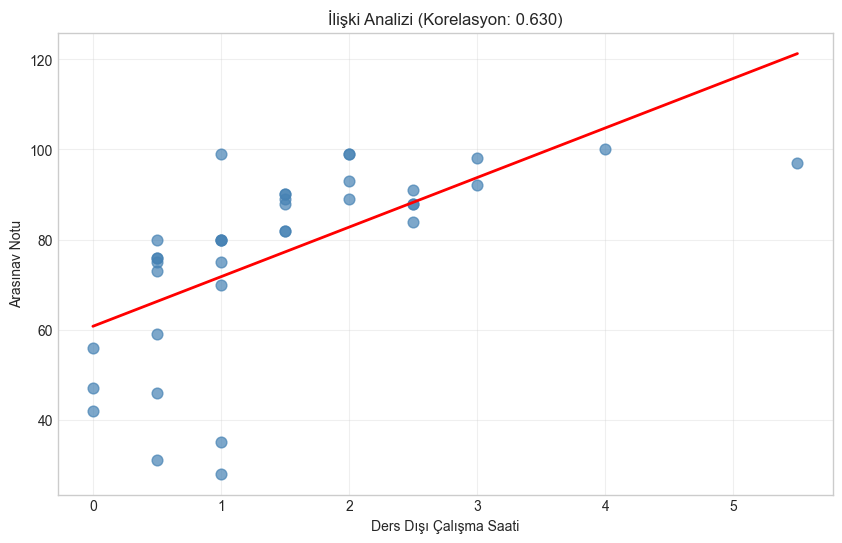

Korelasyon: 0.630
Pozitif ilişki var!


In [56]:
# SORU 1: Ders dışı çalışma saati ile sınav puanı arasında ilişki var mı?
correlation = df['Ders_Disi_Calisma_Saati'].corr(df['Arasinav_Notu'])

plt.figure(figsize=(10, 6))
plt.scatter(df['Ders_Disi_Calisma_Saati'], df['Arasinav_Notu'], 
           alpha=0.7, s=60, color='steelblue')

# Regresyon çizgisi
x_line = np.linspace(df['Ders_Disi_Calisma_Saati'].min(), 
                     df['Ders_Disi_Calisma_Saati'].max(), 100)
y_line = lin_reg.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, color='red', linewidth=2)

plt.xlabel('Ders Dışı Çalışma Saati')
plt.ylabel('Arasınav Notu')
plt.title(f'İlişki Analizi (Korelasyon: {correlation:.3f})')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Korelasyon: {correlation:.3f}")
if correlation > 0.5:
    print("Pozitif ilişki var!")
else:
    print("Güçlü ilişki yok!")

### **Soru 2: Haftada fazladan 1 saat ders dışı çalışma süresi başarı puanını ortalama ne kadar etkiliyor?**

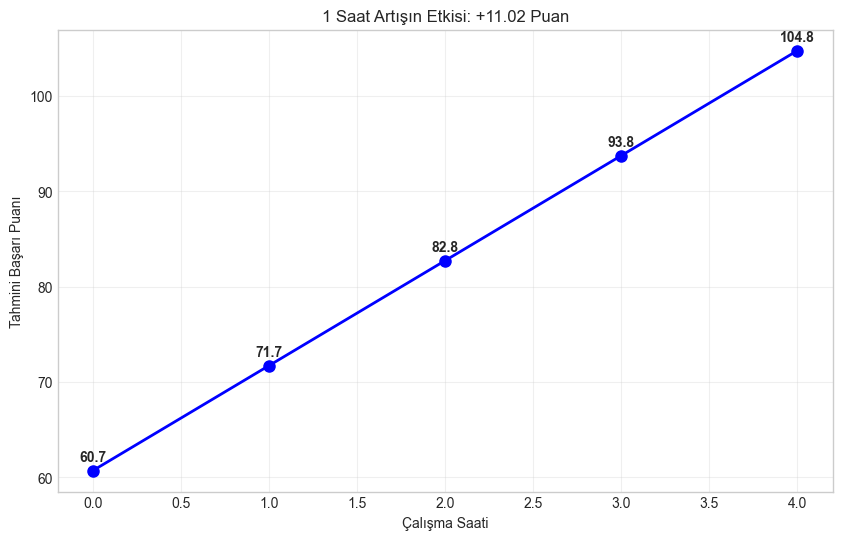

Her 1 saat artış → +11.02 puan artış


In [57]:
# SORU 2: Haftada 1 saat fazla çalışma başarıyı ne kadar etkiliyor?
slope = lin_reg.coef_[0]

# Etki grafiği
saatler = [0, 1, 2, 3, 4]
puanlar = [lin_reg.intercept_ + slope * s for s in saatler]

plt.figure(figsize=(10, 6))
plt.plot(saatler, puanlar, 'bo-', linewidth=2, markersize=8)

for i, (x, y) in enumerate(zip(saatler, puanlar)):
    plt.text(x, y + 1, f'{y:.1f}', ha='center', fontweight='bold')

plt.xlabel('Çalışma Saati')
plt.ylabel('Tahmini Başarı Puanı')
plt.title(f'1 Saat Artışın Etkisi: +{slope:.2f} Puan')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Her 1 saat artış → +{slope:.2f} puan artış")